<a href="https://colab.research.google.com/github/gowravmannem/HackAi_2024/blob/main/HackAI_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: read csv file

import pandas as pd
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Housing.csv')
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
#number of unique rows in each feature

df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [4]:
# prompt: Using dataframe df: looking for duplicate rows

df.duplicated().sum()


0

In [5]:
display(df.describe())

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<ipython-input-6-fbcc8099060d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


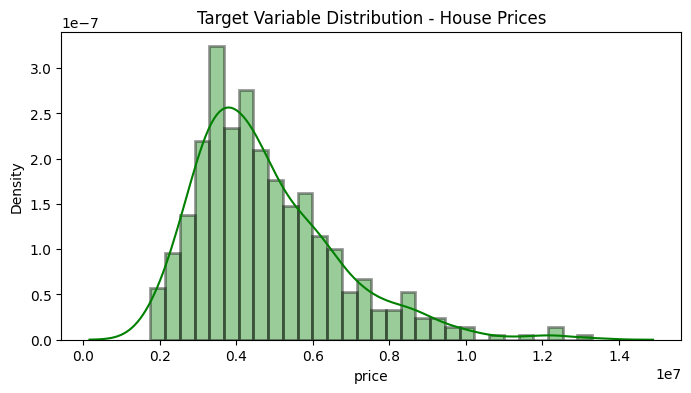

In [6]:
plt.figure(figsize=[8,4])
sns.distplot(df["price"], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - House Prices')
plt.show()

In [ ]:
#import math

#cf=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

#n=3
#plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

#for i in range(len(cf)):
#  if df[cf[i]].nunique()<=8:
 #       plt.subplot(math.ceil(len(cf)/n),n,i+1)
 #       sns.countplot(df[cf[i]])
 # else:
 #       plt.subplot(3,1,3)
 #       sns.countplot(df[cf[i]])
 #
#plt.tight_layout()
#plt.show()

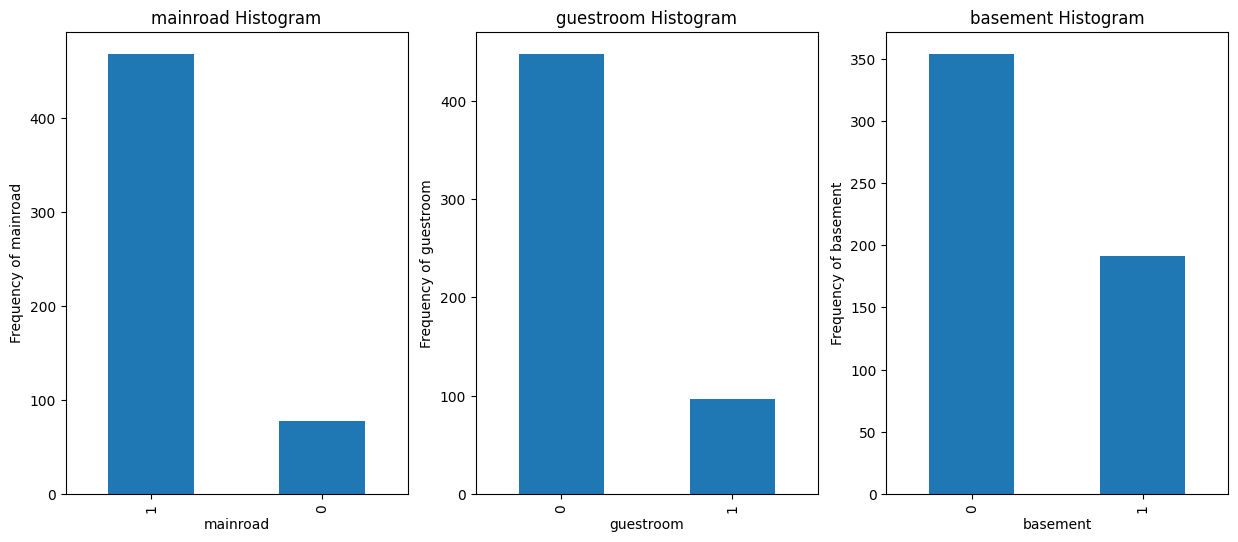

In [21]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histogram')
plt1.set(xlabel = 'mainroad', ylabel='Frequency of mainroad')

plt.subplot(1,3,2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histogram')
plt1.set(xlabel = 'guestroom', ylabel='Frequency of guestroom')

plt.subplot(1,3,3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histogram')
plt1.set(xlabel = 'basement', ylabel='Frequency of basement')

plt.show()

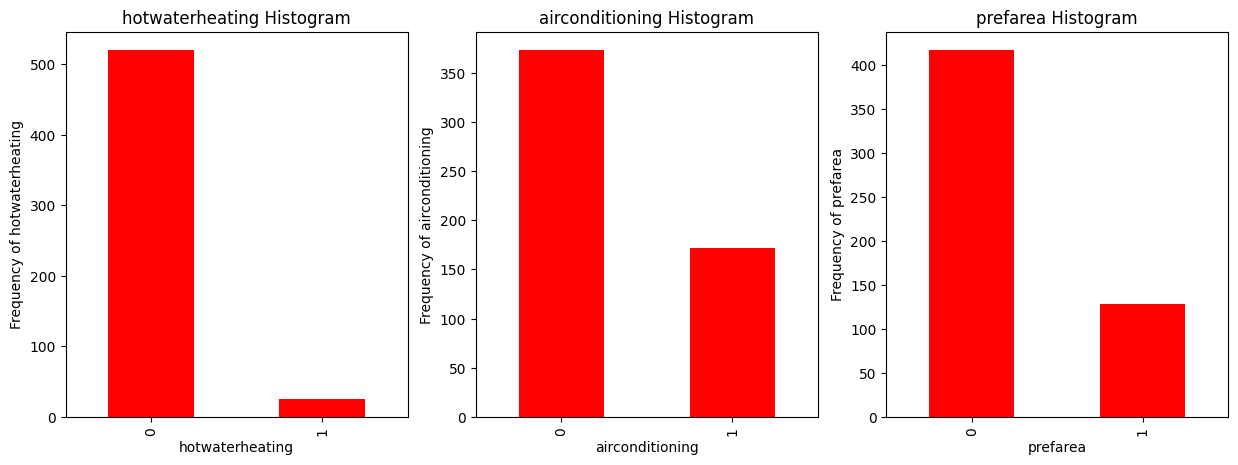

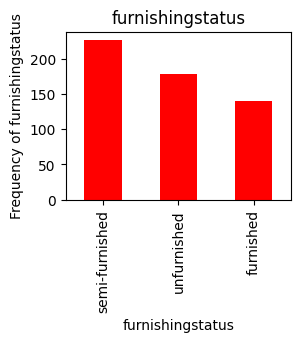

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar',color='r')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frequency of hotwaterheating')

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frequency of furnishingstatus')
plt.show()

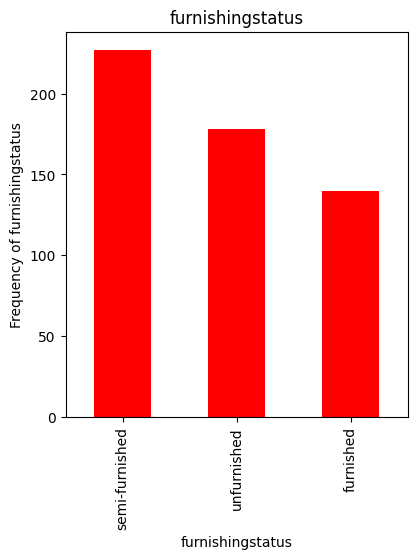

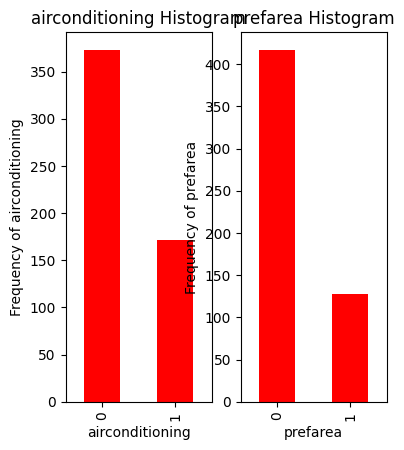

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frequency of furnishingstatus')
plt.show()

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

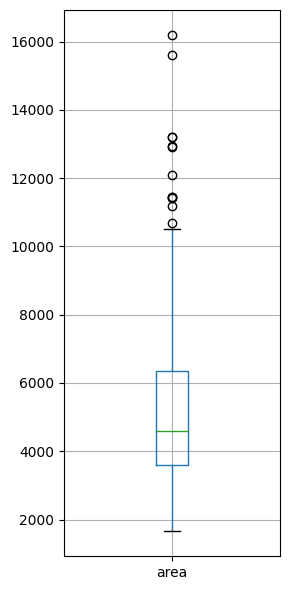

In [7]:
plt.figure(figsize=[3,6])
df.boxplot("area")
plt.tight_layout()
plt.show()

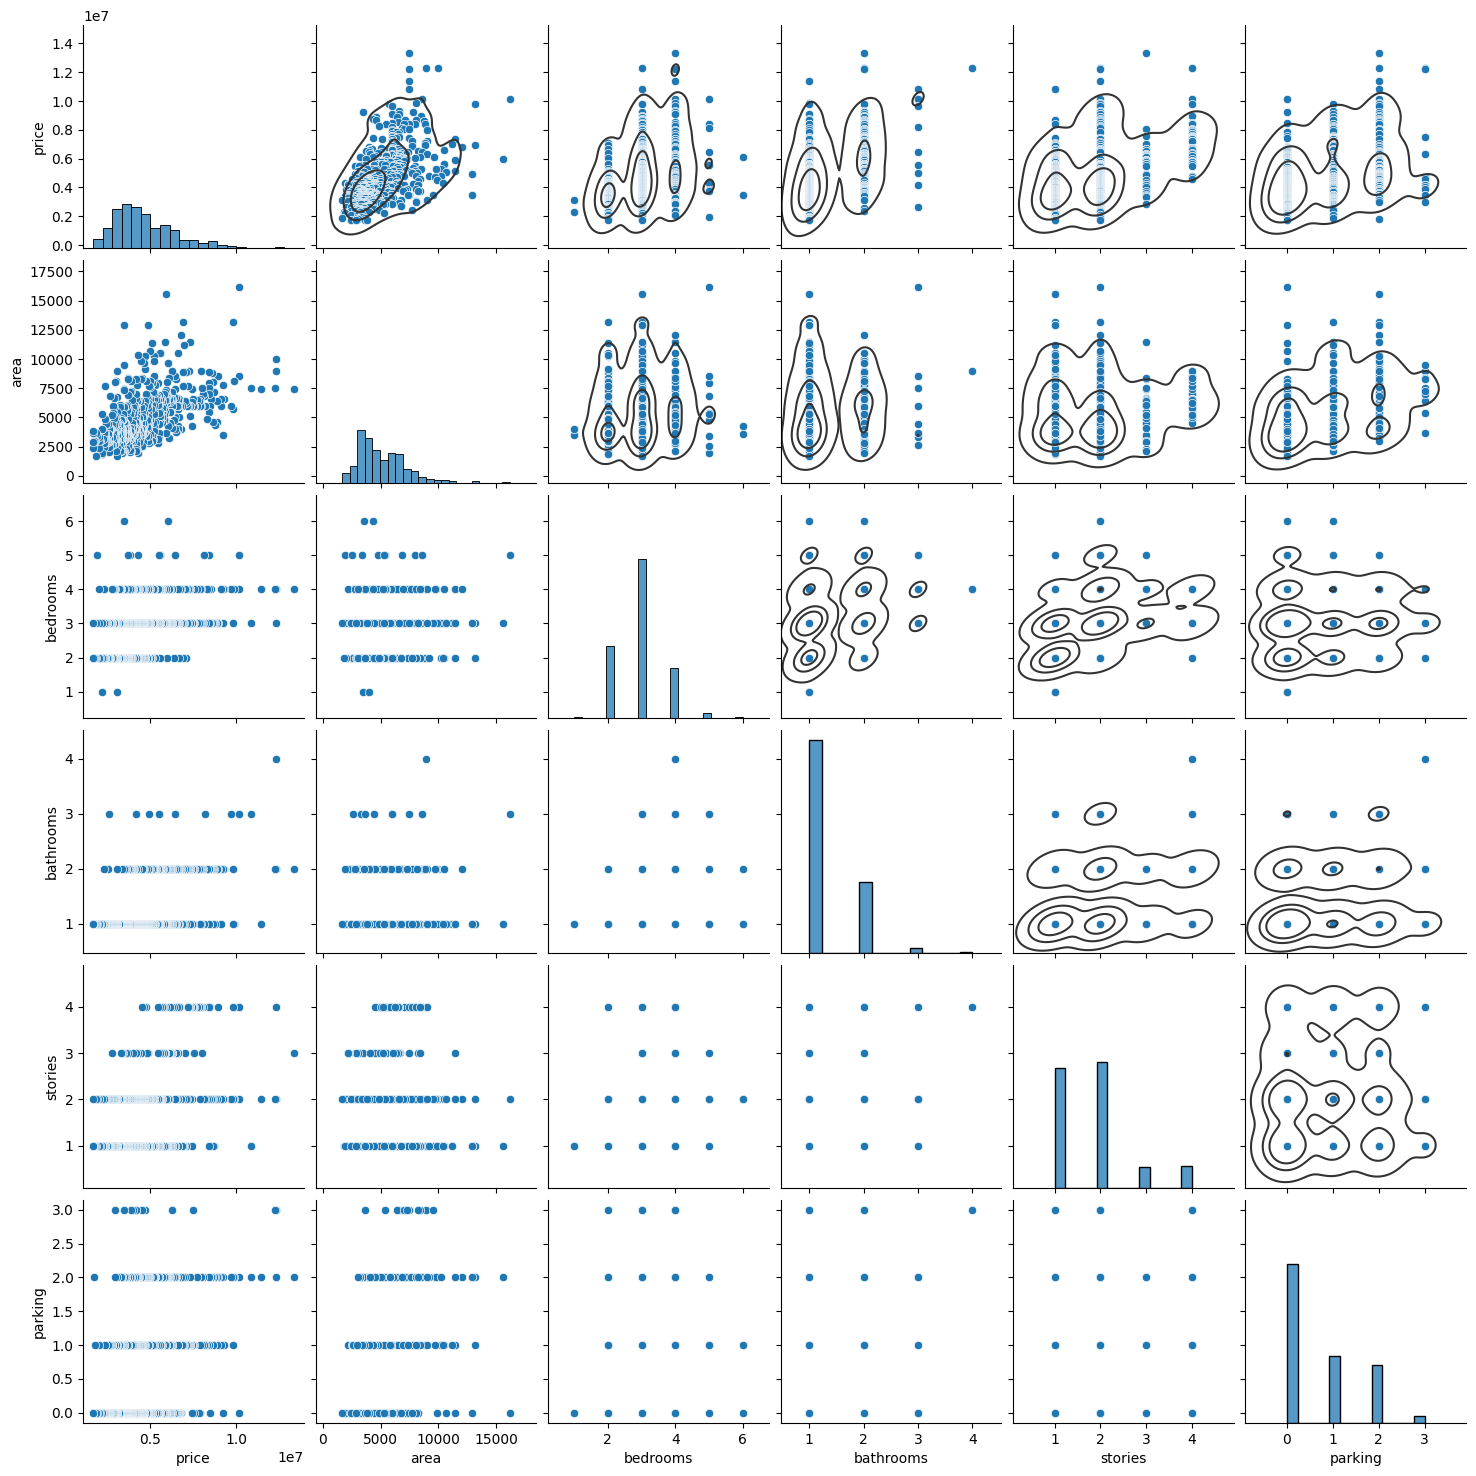

In [8]:
df_numeric=df[["price","area","bedrooms","bathrooms","stories","parking"]]
g = sns.pairplot(df_numeric)
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

<ipython-input-9-ae04a0a26fcc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis',annot=True)


<Axes: >

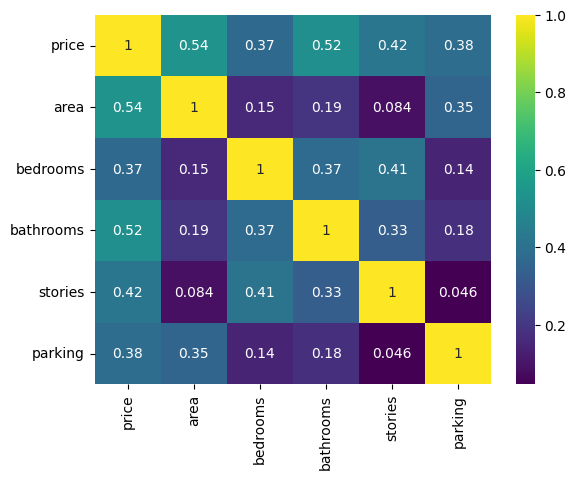

In [9]:
sns.heatmap(df.corr(), cmap='viridis',annot=True)

In [11]:
# prompt: Using dataframe df: convert categorical data into numerical data

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [12]:
dummies = pd.get_dummies(df.furnishingstatus)

# Concatenate the dummies to original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the values
df_new = merged.drop(columns=['furnishingstatus'])

# print the dataframe
df_new

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


<Axes: >

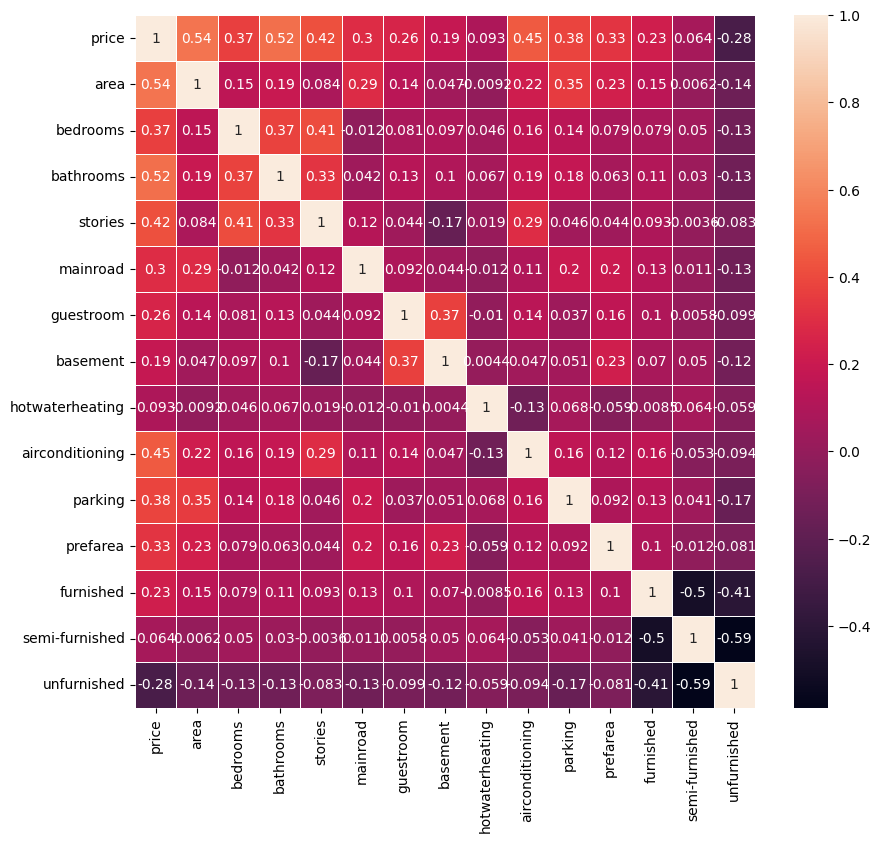

In [17]:
fig, ax = plt.subplots(figsize=(10,9))         # Sample figsize in inches
sns.heatmap(df_new.corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:
# taking out Area data outliers
df1 = df_new.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = ["area"]

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
529,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
530,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
531,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


Took out 12 data points that had Area outliers

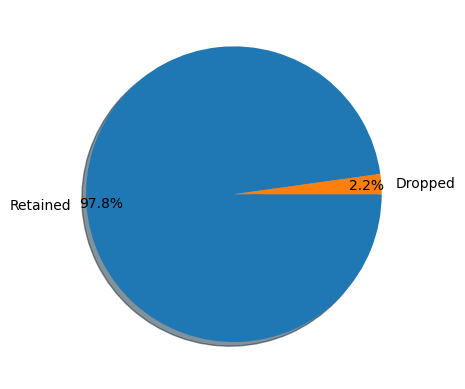

In [ ]:
plt.pie([df1.shape[0], df.shape[0]-df1.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.show()

In [ ]:
X = df1.drop(['price'],axis=1)
y = df1['price']
X_train,X_test,Train_Y,Test_Y = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
Train_X_std = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.fit_transform(X_test)
Test_X_std = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
#Method #1: Just shows residuals and actual vs. predicted values
# does not show the r2 for train and test data.
"""
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XGBoost' : xgb.XGBRegressor(),
    'XGRF Regressor' : xgb.XGBRFRegressor(),
    'Support Vector regressor' : SVR(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
    'LGBM Reg' : LGBMRegressor()
}
"""

"\nmodel = {\n    'Random Forest Regressor' : RandomForestRegressor(),\n    'Gradient Boost Regressor' : GradientBoostingRegressor(),\n    'XGBoost' : xgb.XGBRegressor(),\n    'XGRF Regressor' : xgb.XGBRFRegressor(),\n    'Support Vector regressor' : SVR(),\n    'Lasso Reg' : Lasso(),\n    'Ridge Reg' : Ridge(),\n    'LGBM Reg' : LGBMRegressor()\n}\n"

In [ ]:
"""
pred ={}


for name, model in model.items():
    model.fit(ScaledX_train, y_train)
    y_pred = model.predict(ScaledX_test)
    pred[name]=y_pred
"""

'\npred ={}\n\n\nfor name, model in model.items():\n    model.fit(ScaledX_train, y_train)\n    y_pred = model.predict(ScaledX_test)\n    pred[name]=y_pred\n'

In [ ]:
"""
acc= {}
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Error : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

  """

'\nacc= {}\nfor name, y_pred in pred.items():\n    mse = mean_squared_error(y_test, y_pred)\n    r2 = r2_score(y_test, y_pred)\n    acc[name] = r2\n    print(f"Results for {name} : ")\n    print (f"Mean Square Error : {mse}")\n    print(f"R2 Score : {r2}")\n    plt.figure(figsize=(15, 6))\n\n# Plot Actual vs. Predicted values\n    plt.subplot(1, 2, 1)\n    plt.plot(np.arange(len(y_test)), y_test, label=\'Actual Trend\')\n    plt.plot(np.arange(len(y_test)), y_pred, label=\'Predicted Trend\')\n    plt.xlabel(\'Data\')\n    plt.ylabel(\'Trend\')\n    plt.legend()\n    plt.title(\'Actual vs. Predicted\')\n\n    # Plot Residuals\n    residuals = y_test - y_pred\n\n    plt.subplot(1, 2, 2)\n    plt.scatter(y_pred, residuals)\n    plt.axhline(y=0, color=\'r\', linestyle=\'--\')\n    plt.xlabel(\'Predicted Values\')\n    plt.ylabel(\'Residuals\')\n    plt.title(\'Residual Plot\')\n\n    plt.tight_layout()\n    plt.show()\n\n  '

In [ ]:
"""
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
data
"""

"\ndata = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])\ndata\n"